In [1]:
import pandas as pd 

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


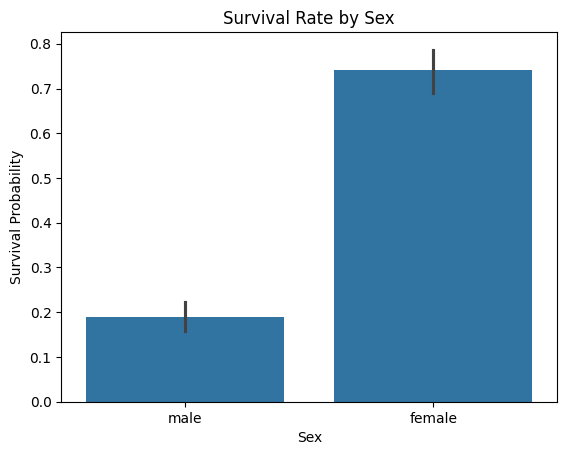

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability')
plt.show()


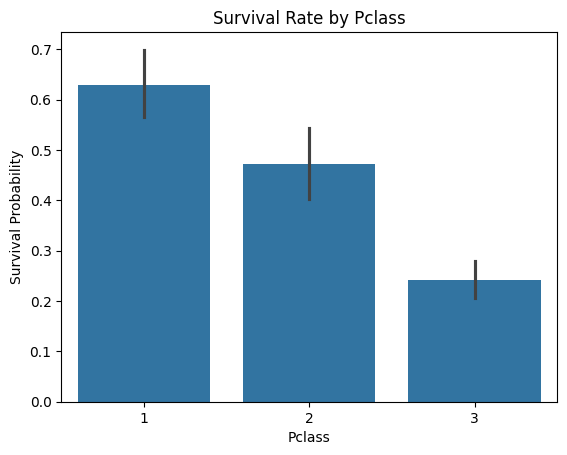

In [5]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Probability')
plt.show()


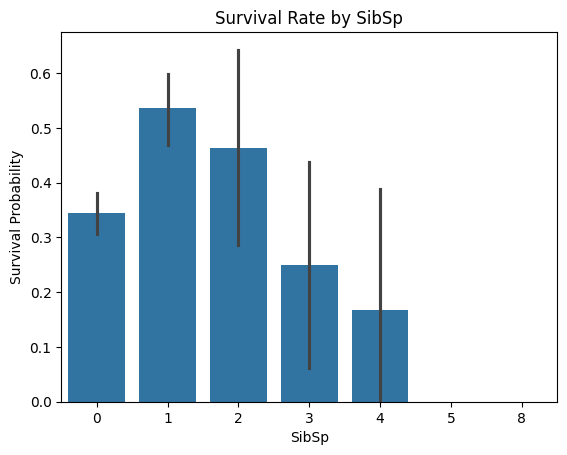

In [6]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Probability')
plt.show()

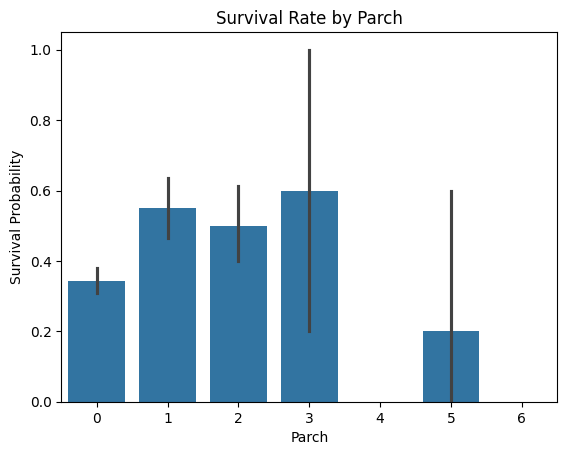

In [7]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Probability')
plt.show()

In [8]:
train_data[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].corr()


,Survived,Age,Fare,SibSp,Parch
Survived,1.000000,-0.077221,0.257307,-0.035322,0.081629
Age,-0.077221,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,-0.189119,0.216225,0.414838,1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]


features = ["Pclass", "Sex", "SibSp", "Fare", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
print(X.isnull().sum())
print(X_test.isnull().sum())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
X['Age'] = X['Age'].fillna(X['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('data/submission.csv', index=False)
print("Your submission was successfully saved!")

Pclass          0
SibSp           0
Fare            0
Age           177
Sex_female      0
Sex_male        0
dtype: int64
Pclass         0
SibSp          0
Fare           1
Age           86
Sex_female     0
Sex_male       0
dtype: int64
Your submission was successfully saved!
